                                        INTRODUCTION
My name is BADMUS HABEEB MUSTAPHA i am a data scientist and a biologist. i choose this project because of my interest in Biostatistics and Public health analysis, i have always want to identify loopholes in the public health sector  and be able to analyze data to give insights for better decision making for any medical firm. I can confidently say that with my analytical skills, I can manipulate data using tools like Excel, SQL, Power BI, Python and R to gain insightful decisions. With the task  of completing the Data Analytics course at SeedBuilders Academy, the task  is to use the datasets made available to analyze,make prediction and  to visualize the data. With these, I will be introducing my 
Hearth Project at SeedBuilders.


import numpy as np # linear algebra
import pandas as pd # data processing

Heart attack also known as myocardial infarction is a blockage of blood flow to the heart muscle. is a medical emergency,usually occurs whena blood clot blocks blood low into the heart. Without blood,tissue losses oxygenand dies.
Early detection,and prompt treatment can help prevent death alongside identifying risks early and carrying out other preventive measures such as lifestyle changes, treatment of comorbidities,and pharmacological intervention.Symptoms include chest pain, fatigue, lightheadness, syncope,shortness of breath etc.

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder

This dataset gotten on kaggle held my interest because heart attack can sometimes present with no symptoms, causing a "silent heart attack" and this is seen in 45% cases.Using this dataset, we can identify risks associated with heart attack,predict what factors are most important in identifying persons at risk and possibly increase response and suspicion index which may result in less mortality due to Coronary artery disease.

In [6]:
ht = pd.read_csv('heart.csv')
ht.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Introduction to data. understanding the data and full name of each column

In [7]:
ht.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


metadata = """
Age : Age of the patient(15-77)

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca:number of major vessels colored by fluoroscopy 
(0-3)

cp : Chest Pain type \n
Value 1: typical angina\n
Value 2: atypical angina\n
Value 3: non-anginal pain\n
Value 4: asymptomatic\n

thall: Thalladium Stress test 
0: no defect
1: fixed defect 
2 : Reversible defect 

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results \n
Value 0: normal \n
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria\n

thalach : maximum heart rate achieved \n
target : 0= less chance of heart attack 1= more chance of heart attack \n

Old peak : ST depression induced by exercise relative to rest
caa :coronary artery anomaly \n
slp: slope of ecg?.

Value 0:Downsloping 
Value 1: Flat
Value 2:Upsloping 

In [9]:
ht.duplicated().sum()

1

Data cleaning: Column names were changed from abbrevaitions to aid understanding. A single duplicate data was removed, no missing values were recorded.

In [10]:
ht.drop_duplicates(inplace = True)

In [11]:
ht.shape

(302, 14)

In [12]:
ht.rename(columns = {'cp':'Chest_Pain_type'},inplace = True )
ht.rename(columns ={'exng': 'Exercise_induced_Angina'},inplace = True)
ht.rename(columns = {'trtbps':'Resting_Blood_Pressure'},inplace = True) 
ht.rename(columns = {'fbs':'Fasting_blood_sugar'},inplace = True )
ht.rename(columns = {'chol':'Serum_Cholesterol'},inplace = True )
ht.rename(columns = {'restecg':'Resting_ECG'},inplace = True )
ht.rename(columns = {'thalachh':'Maximum_Heart_Rate'},inplace = True )
ht.rename(columns = {'slp':'ECG_Slope'},inplace = True )
ht.rename(columns = {'caa':'Coronary_artery_abnormality'},inplace = True )
ht.rename(columns = {'thall':'Thalladium_test'},inplace = True )

In [13]:
ht['sex'][ht['sex'] == 0] = 'female'
ht['sex'][ht['sex'] == 1] = 'male'


ht['Chest_Pain_type'][ht['Chest_Pain_type'] == 0] = 'typical angina'
ht['Chest_Pain_type'][ht['Chest_Pain_type'] == 1] = 'atypical angina'
ht['Chest_Pain_type'][ht['Chest_Pain_type'] == 2] = 'non-anginal pain'
ht['Chest_Pain_type'][ht['Chest_Pain_type'] == 3] = 'asymptomatic'

ht['Fasting_blood_sugar'][ht['Fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
ht['Fasting_blood_sugar'][ht['Fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

ht['Resting_ECG'][ht['Resting_ECG'] == 0] = 'normal'
ht['Resting_ECG'][ht['Resting_ECG'] == 1] = 'ST-T wave abnormality'
ht['Resting_ECG'][ht['Resting_ECG'] == 2] = 'left ventricular hypertrophy'

ht['Exercise_induced_Angina'][ht['Exercise_induced_Angina'] == 0] = 'no'
ht['Exercise_induced_Angina'][ht['Exercise_induced_Angina'] == 1] = 'yes'

ht['ECG_Slope'][ht['ECG_Slope'] == 0] = 'upsloping'
ht['ECG_Slope'][ht['ECG_Slope'] == 1] = 'flat'
ht['ECG_Slope'][ht['ECG_Slope'] == 2] = 'downsloping'

ht['Thalladium_test'][ht['Thalladium_test'] == 1] = 'fixed defect'
ht['Thalladium_test'][ht['Thalladium_test'] == 2] = 'normal'
ht['Thalladium_test'][ht['Thalladium_test'] == 3] = 'reversable defect'

In [46]:
ht
ht.info

<bound method DataFrame.info of      age     sex   Chest_Pain_type  Resting_Blood_Pressure  Serum_Cholesterol  \
0     63    male      asymptomatic                     145                233   
1     37    male  non-anginal pain                     130                250   
2     41  female   atypical angina                     130                204   
3     56    male   atypical angina                     120                236   
4     57  female    typical angina                     120                354   
..   ...     ...               ...                     ...                ...   
298   57  female    typical angina                     140                241   
299   45    male      asymptomatic                     110                264   
300   68    male    typical angina                     144                193   
301   57    male    typical angina                     130                131   
302   57  female   atypical angina                     130                236

Grouping features by data type

In [15]:
# continous fearures 
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'output']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'rest_electrocardiographic', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

In [16]:
background_color = "#F0F8FF"
color_palette = ["#008000","#8000ff","#6aac90","#5833ff","#36648B"]

Among the population recorded in our data, what is the frequency of those having a heart attack?


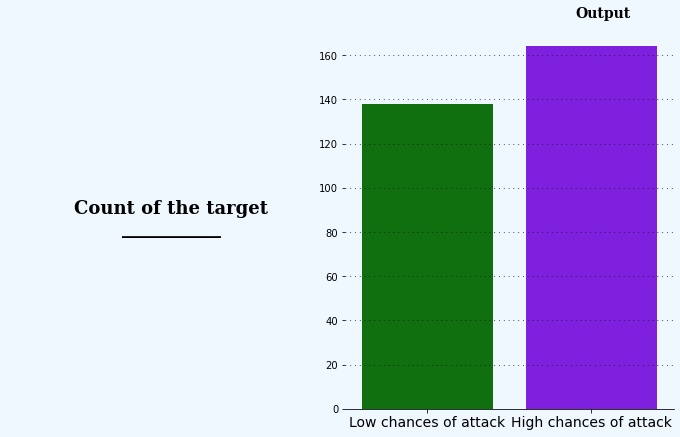

In [17]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.03, hspace=0.05)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.9,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=ht, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack","High chances of attack"],fontsize = 14)

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

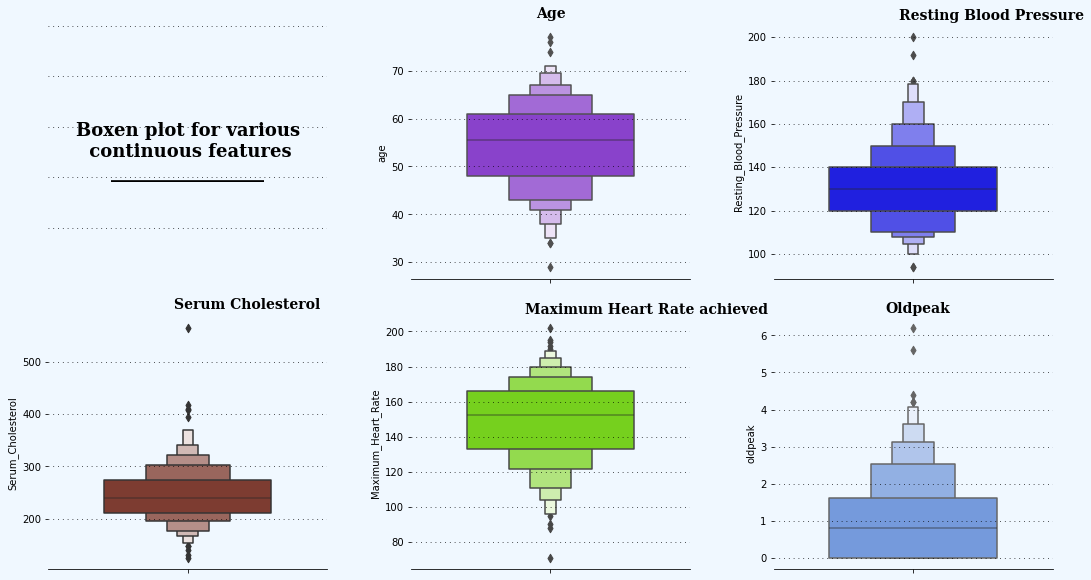

In [18]:
# analysis of continuous features

fig2 = plt.figure(figsize=(18,10))
gs = fig2.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig2.add_subplot(gs[0,0])
ax1 = fig2.add_subplot(gs[0,1])
ax2 = fig2.add_subplot(gs[0,2])
ax3 = fig2.add_subplot(gs[1,0])
ax4 = fig2.add_subplot(gs[1,1])
ax5 = fig2.add_subplot(gs[1,2])

axes = [ax0,ax1,ax2,ax3,ax4,ax5]

fig2.patch.set_facecolor(background_color) 
for a in axes:
    a.set_facecolor(background_color)
    a.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    
# Title of the plot
for s in ["top","right",'bottom',"left"]: 
        ax0.spines[s].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.boxenplot(ax=ax1,y=ht['age'],palette=["#8A2BE2"],width=0.6)


# resting_blood_pressure
ax2.text(-0.05, 208, 'Resting Blood Pressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.boxenplot(ax=ax2,y=ht['Resting_Blood_Pressure'],palette=["#0000ff"],width=0.6)

# serum cholesterol 
ax3.text(-0.05, 600, 'Serum Cholesterol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.boxenplot(ax=ax3,y=ht['Serum_Cholesterol'],palette=["#8A3324"],width=0.6)


# maximum heart rate
ax4.text(-0.09, 210, 'Maximum Heart Rate achieved', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.boxenplot(ax=ax4,y=ht['Maximum_Heart_Rate'],palette=["#76EE00"],width=0.6)


# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
sns.boxenplot(ax=ax5,y=ht['oldpeak'],palette=["#6495ED"],width=0.6)


for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

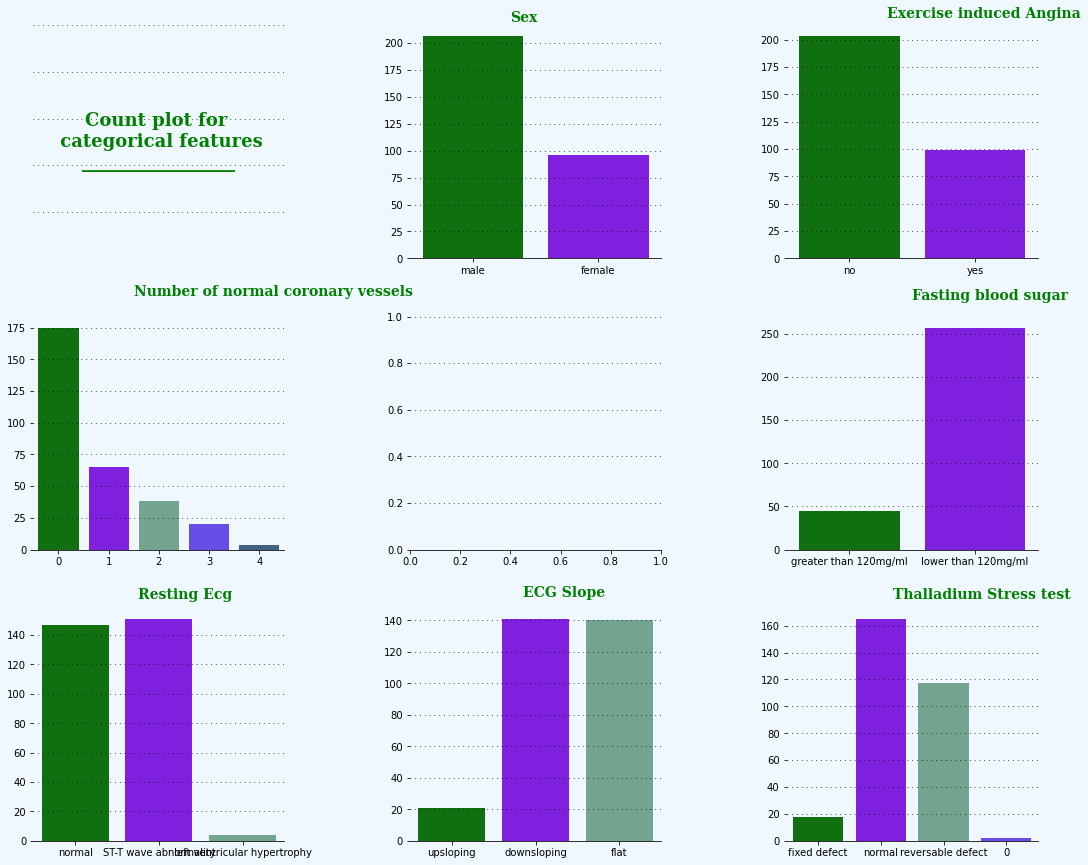

In [19]:
# analysis of categorical variables
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

axes = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
fig.patch.set_facecolor(background_color) 

for a in axes:
    a.set_facecolor(background_color)
    a.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    a.set_xlabel(" ")
    a.set_ylabel(" ")
    
for s in ["top","right",'bottom',"left"]: 
        ax0.spines[s].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for \n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#008000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#008000")
sns.countplot(ax=ax1,data=ht,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
# Exercise_induced_Angina count
ax2.text(0.3, 220, 'Exercise induced Angina', fontsize=14, fontweight='bold', fontfamily='serif', color="#008000")
sns.countplot(ax=ax2,data=ht,x='Exercise_induced_Angina',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Coronary_artery_abnormality count
ax3.text(1.5, 200, 'Number of normal coronary vessels', fontsize=14, fontweight='bold', fontfamily='serif', color="#008000")
sns.countplot(ax=ax3,data=ht,x='Coronary_artery_abnormality',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chest_Pain_type count
#ax4.text(1.5, 162, 'Chest Pain type', fontsize=14, fontweight='bold', fontfamily='serif', color="#008000")
#sns.countplot(ax=ax4,data=ht,x='Chest_Pain_type',palette=color_palette)
#ax4.set_xlabel("")
#ax4.set_ylabel("")

# Fasting_blood_sugar count
ax5.text(0.5, 290, 'Fasting blood sugar', fontsize=14, fontweight='bold', fontfamily='serif', color="#008000")
sns.countplot(ax=ax5,data=ht,x='Fasting_blood_sugar',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Resting_ECG count
ax6.text(0.75, 165, 'Resting Ecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#008000")
sns.countplot(ax=ax6,data=ht,x='Resting_ECG',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# ECG slope count
ax7.text(0.85, 155, 'ECG Slope', fontsize=14, fontweight='bold', fontfamily='serif', color="#008000")
sns.countplot(ax=ax7,data=ht,x='ECG_Slope',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalladium_test count
ax8.text(1.2, 180, 'Thalladium Stress test', fontsize=14, fontweight='bold', fontfamily='serif', color="#008000")
sns.countplot(ax=ax8,data=ht,x='Thalladium_test',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")
for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

Features analysis

Majority of the patients age are (50–60).In which maximum number of Patients have age 56.

Around 68.2% (207) are Male patients and 31.8% (96) are Female patients .

Majority of the patients have type Value 1 Chest Pain that is typical angina Value.

Majority of the patients' blood pressure lies between the range (120–140).

Majority of the patients' serum cholesterol level lies between the range (200–250).

Majority of the patients' maximum heart Rate lies between the range (155–165)

Majority of the patients(48.5%) had normal ECG results.

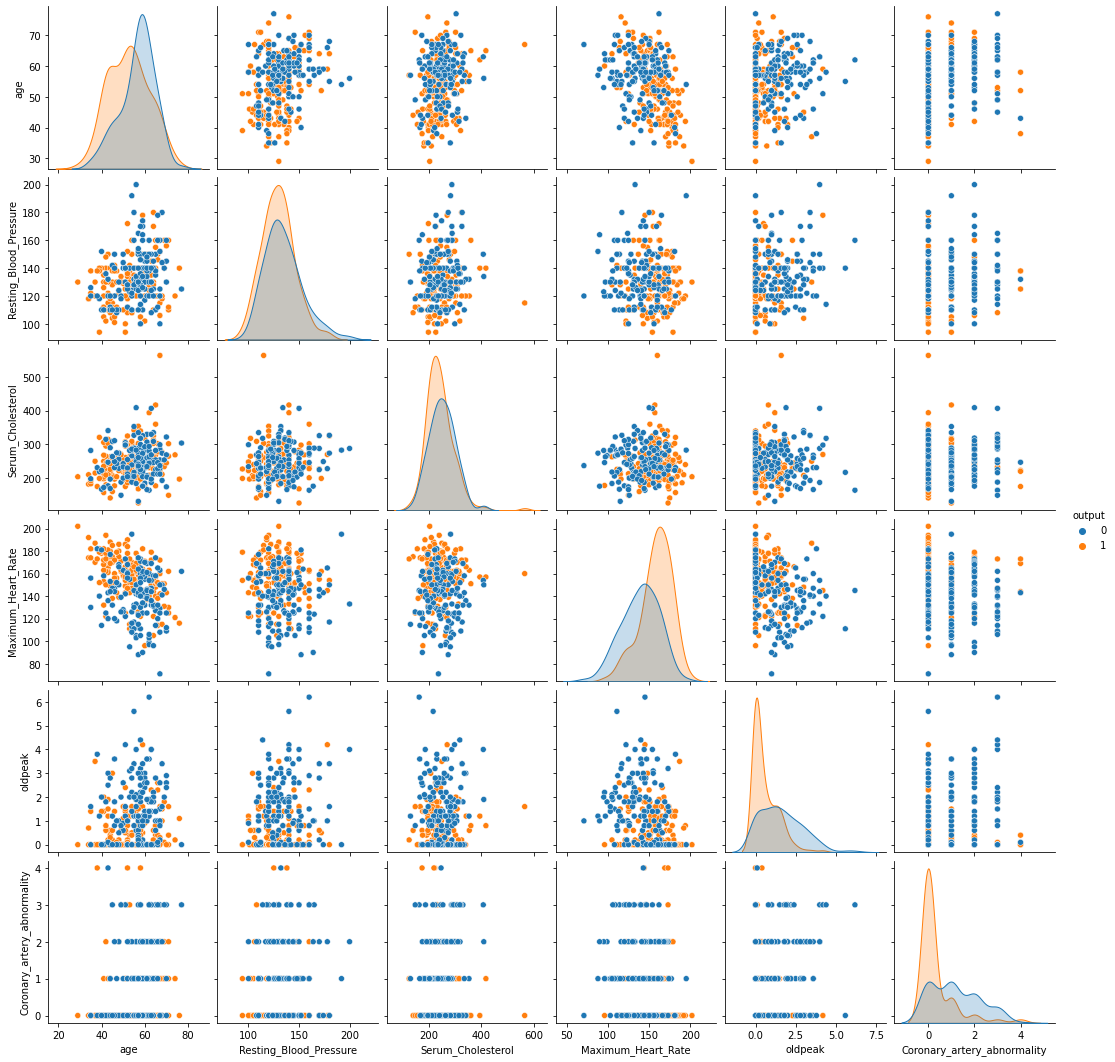

In [23]:
sns.pairplot(data= ht , hue = 'output')
plt.show()


Data Modelling


In [26]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('imported...')

imported...


Making features, scalling  and using encoding features to get our model ready 

In [59]:
# creating a copy of df
ht1 = ht

# define the columns to be encoded and scaled
cat_cols = ['sex','Coronary_artery_abnormality','Fasting_blood_sugar','Resting_ECG','ECG_Slope','Thalladium_test','Chest_Pain_type','Exercise_induced_Angina']
con_cols = ["age","Resting_Blood_Pressure","Serum_Cholesterol","Maximum_Heart_Rate","oldpeak"]

# encoding the categorical columns
ht1 = pd.get_dummies(ht1, columns = cat_cols, drop_first = True)

# defining the features and target
X = ht1.drop(['output'],axis=1)
y = ht1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 10 rows of X are")
X.head()

The first 10 rows of X are


,age,Resting_Blood_Pressure,Serum_Cholesterol,Maximum_Heart_Rate,oldpeak,sex_male,Coronary_artery_abnormality_1,Coronary_artery_abnormality_2,Coronary_artery_abnormality_3,Coronary_artery_abnormality_4,...,Resting_ECG_normal,ECG_Slope_flat,ECG_Slope_upsloping,Thalladium_test_fixed defect,Thalladium_test_normal,Thalladium_test_reversable defect,Chest_Pain_type_atypical angina,Chest_Pain_type_non-anginal pain,Chest_Pain_type_typical angina,Exercise_induced_Angina_yes
0,0.576923,0.75,-0.117647,-0.076336,0.9375,1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
1,-1.423077,0.00,0.149020,1.053435,1.6875,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,-1.115385,0.00,-0.572549,0.595420,0.3750,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,0.038462,-0.50,-0.070588,0.778626,0.0000,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0.115385,-0.50,1.780392,0.320611,-0.1250,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1


train and test split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (241, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (241, 1)
The shape of y_test is        (61, 1)


Modelling


Support Vector Machine

In [64]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8360655737704918


The support vector machine algorithm prediction is 83.6%

LOGISTIC REGRESSION

In [76]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.9016393442622951


The logistic regression algorithm is 90.16%

In [66]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.8360655737704918


The decision tree algorithm prediction is 83.6%

In [67]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.8360655737704918


The random forest classifier Algorithm is 83.6%

In [68]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Gradient Boosting Classifier is  0.8852459016393442


The gradientboostingclassifier prediction is 88.5%

EVALUATION METRICS

In [70]:
from sklearn import metrics

In [71]:
metrics.accuracy_score(y_test, SVMmodel_prediction)

0.9180327868852459

In [72]:
#checking the F1 score to see if our prediction is accurate
metrics.f1_score(y_test, SVMmodel_prediction)

0.9180327868852458

The accuracy score is 91.8% while the F1 score is 91.8% 
this means our SVM model prediction perform very well'

In [95]:
logisticmodel = LogisticRegression()

logisticmodel.fit(X_train, y_train)

LogisticRegression()

In [96]:
logisticmodel.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [97]:
logistic_prediction = logisticmodel.predict(X_test)

In [98]:
metrics.accuracy_score(y_test, logistic_prediction)

0.9016393442622951

In [99]:
metrics.f1_score(y_test, logistic_prediction)

0.9032258064516129

The accuracy score for the logistic regression is 90.16% while te F1 score is 90.32%.

In [101]:
randomforestmodel = RandomForestClassifier()

randomforestmodel.fit(X_train, y_train)

randomforestmodel_prediction = randomforestmodel.predict(X_test)

In [102]:
randomforestmodel_prediction

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [103]:
metrics.accuracy_score(y_test, randomforestmodel_prediction)

0.8524590163934426

In [104]:
metrics.f1_score(y_test, randomforestmodel_prediction)

0.8571428571428571

The accuracy score for random forest model is 85.25% while the F1 score is 85.71%

In [106]:

Decisiontreemodel = DecisionTreeClassifier(random_state = 42)

decisiontreemodel = Decisiontreemodel.fit(X_train, y_train)

In [107]:
decisiontreemodel_prediction = Decisiontreemodel.predict(X_test)

In [108]:
decisiontreemodel_prediction

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [109]:
metrics.accuracy_score(y_test, decisiontreemodel_prediction)

0.8360655737704918

In [111]:
metrics.f1_score(y_test, decisiontreemodel_prediction)

0.8275862068965517

The accuracy score for decision tree is 83.6% while the F1 score is 82.8%

In [112]:
gradientboostingmodel = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)
Gradientboostingmodel = gradientboostingmodel.fit(X_train, y_train)

In [113]:
Gradientboostingmodel_prediction = gradientboostingmodel.predict(X_test)

In [114]:
Gradientboostingmodel_prediction

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [115]:
metrics.accuracy_score(y_test, Gradientboostingmodel_prediction )

0.8852459016393442

In [116]:
metrics.f1_score(y_test, Gradientboostingmodel_prediction)

0.8888888888888888

The accuracy and F1 score of gradient boost model is 88.5% and 88.8% respectively.

# Conclusion